In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"meryemeerrkik","key":"e52558dc1cf5e760d0087d841c77537c"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 35.1MB/s]
100% 9.16M/9.16M [00:00<00:00, 45.0MB/s]
 82% 5.00M/6.09M [00:00<00:00, 32.0MB/s]
100% 6.09M/6.09M [00:00<00:00, 29.8MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 210MB/s]


In [6]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [7]:
!unzip '/content/test.csv.zip' -d '/content/test.csv'
!unzip '/content/train.csv.zip' -d '/content/train.csv'

Archive:  /content/test.csv.zip
  inflating: /content/test.csv/test.csv  
Archive:  /content/train.csv.zip
  inflating: /content/train.csv/train.csv  


In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Nadam ,RMSprop
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator




# Load Data

In [9]:
train_set= pd.read_csv('/content/train.csv/train.csv')
test_set= pd.read_csv('/content/test.csv/test.csv')
submission= pd.read_csv("/content/sample_submission.csv")

In [10]:
print(train_set.shape)
print(test_set.shape)

(42000, 785)
(28000, 784)


In [11]:
train_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Preprocessing

In [12]:
y_train= train_set.iloc[:,0].values.astype('int32')
x_train= train_set.iloc[:,1:].values.astype('float32')
x_test = test_set.values.astype('float32')

In [13]:
#reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
print(x_train.shape, x_test.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


In [14]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


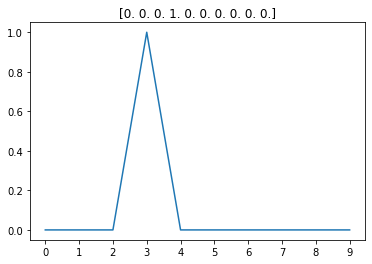

In [16]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

In [17]:
#Split training and valdiation set
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

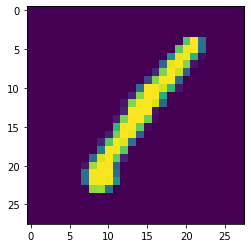

In [18]:
g = plt.imshow(x_train[0][:,:,0])

# Define the model

In [22]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
optimizer = Nadam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

In [23]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [26]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [27]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [29]:
history = model.fit(X_train,Y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
439/439 - 3s - loss: 0.2286 - accuracy: 0.9273 - val_loss: 0.0537 - val_accuracy: 0.9798
Epoch 2/30
439/439 - 3s - loss: 0.0685 - accuracy: 0.9790 - val_loss: 0.0414 - val_accuracy: 0.9864
Epoch 3/30
439/439 - 3s - loss: 0.0517 - accuracy: 0.9844 - val_loss: 0.0365 - val_accuracy: 0.9886
Epoch 4/30
439/439 - 3s - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0321 - val_accuracy: 0.9907
Epoch 5/30
439/439 - 3s - loss: 0.0394 - accuracy: 0.9881 - val_loss: 0.0401 - val_accuracy: 0.9902
Epoch 6/30
439/439 - 3s - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0330 - val_accuracy: 0.9921
Epoch 7/30
439/439 - 3s - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0341 - val_accuracy: 0.9905
Epoch 8/30
439/439 - 3s - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0293 - val_accuracy: 0.9921
Epoch 9/30
439/439 - 3s - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0305 - val_accuracy: 0.9914
Epoch 10/30
439/439 - 3s - loss: 0.0237 - accuracy: 0.9922 - val_loss: 0.0270 - val_accuracy: 0.9933

In [31]:
# predict results
results = model.predict(x_test)
# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [32]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_submission.csv",index=False)

In [33]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
